In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from PIL import Image 

In [3]:
df_raw_train = pd.read_csv("../data/mnist_hand_signal/archive/sign_mnist_train.csv")
df_raw_test = pd.read_csv("../data/mnist_hand_signal/archive/sign_mnist_test.csv")

df_raw = pd.concat([df_raw_train, df_raw_test], axis=0)

df_raw.shape

# reset/drop index
df_raw.reset_index(drop=True, inplace=True)

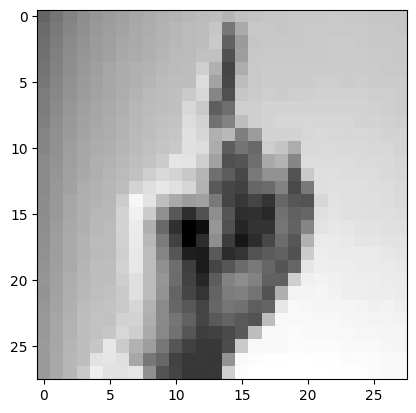

In [4]:
pixels = df_raw.loc[0][1:].to_numpy().reshape(28, 28)
pixels

plt.imshow(pixels, cmap='gray')

# save as image
plt.imsave("test.png", pixels, cmap='gray')

In [5]:
labels_dict = {
    0 : 'A',
    1 : 'B',
    2 : 'C',
    3 : 'D',
    4 : 'E',
    5 : 'F',
    6 : 'G',
    7 : 'H',
    8 : 'I',
    10 : 'K',
    11 : 'L',
    12 : 'M',
    13 : 'N',
    14 : 'O',
    15 : 'P',
    16 : 'Q',
    17 : 'R',
    18 : 'S',
    19 : 'T',
    20 : 'U',
    21 : 'V',
    22 : 'W',
    23 : 'X',
    24 : 'Y'
}

labels_dict

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y'}

/tmp/ipykernel_595082/1101798299.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df_raw.loc[i][0]


saved img: ../data/full_set/letter_D/img_0.png
saved img: ../data/full_set/letter_G/img_1.png
saved img: ../data/full_set/letter_C/img_2.png
saved img: ../data/full_set/letter_C/img_3.png
saved img: ../data/full_set/letter_N/img_4.png
saved img: ../data/full_set/letter_Q/img_5.png
saved img: ../data/full_set/letter_I/img_6.png
saved img: ../data/full_set/letter_W/img_7.png
saved img: ../data/full_set/letter_D/img_8.png
saved img: ../data/full_set/letter_D/img_9.png
saved img: ../data/full_set/letter_S/img_10.png
saved img: ../data/full_set/letter_K/img_11.png
saved img: ../data/full_set/letter_Q/img_12.png
saved img: ../data/full_set/letter_W/img_13.png
saved img: ../data/full_set/letter_U/img_14.png
saved img: ../data/full_set/letter_Q/img_15.png
saved img: ../data/full_set/letter_R/img_16.png
saved img: ../data/full_set/letter_N/img_17.png
saved img: ../data/full_set/letter_N/img_18.png
saved img: ../data/full_set/letter_T/img_19.png
saved img: ../data/full_set/letter_S/img_20.png
sa

KeyError: 34627

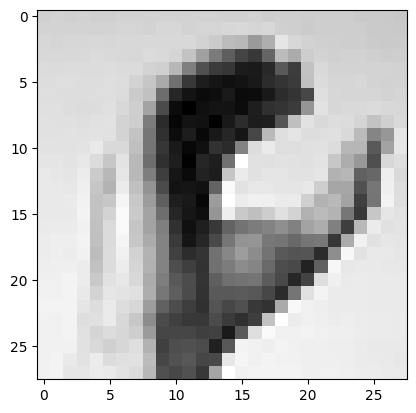

In [6]:
save_images = False

if save_images:
    number_of_rows = df_raw.shape[0]

    for i in range(number_of_rows):
        pixels = df_raw.loc[i][1:].to_numpy().reshape(28, 28)
        label = df_raw.loc[i][0]

        # get letter from label
        label = labels_dict[label]

        plt.imshow(pixels, cmap='gray')

        output_dir = f"../data/full_set/letter_{label}/img_{i}.png"
        
        if not os.path.exists(f"../data/full_set/letter_{label}"):
            os.makedirs(f"../data/full_set/letter_{label}")

        plt.imsave(output_dir, pixels, cmap='gray')
        print(f"saved img: {output_dir}")

In [7]:
import pandas as pd
import numpy as np
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe_model_maker import gesture_recognizer

from PIL import Image 

2024-03-17 21:39:52.940784: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-17 21:39:53.076223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /media/light/HDD/vision/.linux_venv/lib/python3.10/site-packages/cv2/../../lib64:
2024-03-17 21:39:53.076247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-03-17 21:39:53.103219: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when 

In [30]:
IMAGES_PATH = "../data/full_set/"

data = gesture_recognizer.Dataset.from_folder(
    dirname=IMAGES_PATH,
    hparams=gesture_recognizer.HandDataPreprocessingParams(
        shuffle=True,
        min_detection_confidence=0.5,
    )
)

# Split the archive into training, validation and test dataset.
train_data, rest_data = data.split(0.6)
validation_data, test_data = rest_data.split(0.6)
data._dataset.save(path="conf050")

TypeError: Dataset.from_folder() got an unexpected keyword argument 'image_preprocessing_fn'

In [20]:
# data._dataset.save(path="conf075")

In [27]:
try:
    del model
except:
    print("Model not found")

# Train the model
try_id = "full_set02_conf060"
model_id = f"american_hand_sign_model_{try_id}"

hparams = gesture_recognizer.HParams(export_dir=model_id)

options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
options.hparams.batch_size=15
options.hparams.learning_rate=5e-4
options.hparams.epochs=40

# model learning rate decay
options.hparams.decay=0.96

print(f"running model id: {model_id}")

model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

running model id: american_hand_sign_model_full_set02_conf060
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer)  [(None, 128)]            0         
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 re_lu_6 (ReLU)              (None, 128)               0         
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_o  (None, 25)               3225      
 ut (Dense)                                                      
                                                               

In [28]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

model.export_model()
test_path_dir = "../data/test"

model_id = f"american_hand_sign_model_{try_id}"
task_file = f"{model_id}/gesture_recognizer.task"
recognizer = vision.GestureRecognizer.create_from_model_path(task_file)
print(f"Model id: {model_id}")


for file in os.listdir(test_path_dir):
    image = mp.Image.create_from_file(f"{test_path_dir}/{file}")

    # Run gesture recognition.
    recognition_result = recognizer.recognize(image)

    # Display the most likely gesture.
    if len(recognition_result.gestures) > 0:
        top_gesture = recognition_result.gestures[0][0]
        print(f"Gesture recognized: {file} {top_gesture.category_name} ({top_gesture.score}) for file {file}")
    else:
        print(f"No result for file {file}")

path_to_move_models = "../models"
os.system(f"mv {model_id}/gesture_recognizer.task {path_to_move_models}/model{try_id}.task")

53/53 [==============================] - 0s 787us/step - loss: 0.9793 - categorical_accuracy: 0.7170
Test loss:0.9793331027030945, Test accuracy:0.7169811129570007
INFO:tensorflow:Assets written to: /tmp/tmp8xpp1r2z/saved_model/assets


2024-03-17 23:27:16.014147: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-03-17 23:27:16.014179: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-03-17 23:27:16.014313: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp8xpp1r2z/saved_model
2024-03-17 23:27:16.015345: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-03-17 23:27:16.015361: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp8xpp1r2z/saved_model
2024-03-17 23:27:16.017546: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2024-03-17 23:27:16.033585: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmp8xpp1r2z/saved_model
2024-03-17 23:27:16.038922: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve 

Model id: american_hand_sign_model_full_set02_conf060
Gesture recognized: american_sign_a.jpg  (0.5748365521430969) for file american_sign_a.jpg
Gesture recognized: american_sign_b.png letter_B (0.9499719142913818) for file american_sign_b.png
Gesture recognized: american_sign_c.jpg  (0.5117308497428894) for file american_sign_c.jpg
Gesture recognized: american_sign_f.jpg letter_M (0.508080005645752) for file american_sign_f.jpg
Gesture recognized: american_sign_g.jpeg  (0.9218428730964661) for file american_sign_g.jpeg
Gesture recognized: american_sign_h.jpeg  (0.7922808527946472) for file american_sign_h.jpeg
Gesture recognized: american_sign_i letter_Y (0.5547979474067688) for file american_sign_i
Gesture recognized: american_sign_k.jpg  (0.46208280324935913) for file american_sign_k.jpg
Gesture recognized: american_sign_L.jpg  (0.8888788223266602) for file american_sign_L.jpg
No result for file img46_letter_A.png
No result for file img59_letter_A.png


0